# run to google.colab

## Model BERT

In [ ]:
import pandas as pd
from transformers import BertTokenizer, BertForSequenceClassification
from sklearn.preprocessing import LabelEncoder
import torch


from google.colab import files
uploaded = files.upload()

df = pd.read_csv("/content/sentimentdataset.csv")

# lable 
df['Sentiment'] = df['Sentiment'].astype(str).str.strip().str.lower()
label_encoder = LabelEncoder()
df['label'] = label_encoder.fit_transform(df['Sentiment'])

#  mode and tokenizer
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
model = BertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=3)
model.eval()

# tokenizer
texts = df["Text"].tolist()
inputs = tokenizer(texts, padding=True, truncation=True, return_tensors="pt")


with torch.no_grad():
    outputs = model(**inputs)
    preds = torch.argmax(outputs.logits, dim=1)

df["PredictedSentiment"] = label_encoder.inverse_transform(preds.numpy())


df.to_csv("sentiment_predictions.csv", index=False)
files.download("sentiment_predictions.csv")


In [ ]:
import pandas as pd

# Load the predictions file
df = pd.read_csv("..\data\sentiment_predictions.csv")


df.info(), df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0.1        732 non-null    int64  
 1   Unnamed: 0          732 non-null    int64  
 2   Text                732 non-null    object 
 3   Sentiment           732 non-null    object 
 4   Timestamp           732 non-null    object 
 5   User                732 non-null    object 
 6   Platform            732 non-null    object 
 7   Hashtags            732 non-null    object 
 8   Retweets            732 non-null    float64
 9   Likes               732 non-null    float64
 10  Country             732 non-null    object 
 11  Year                732 non-null    int64  
 12  Month               732 non-null    int64  
 13  Day                 732 non-null    int64  
 14  Hour                732 non-null    int64  
 15  label               732 non-null    int64  
 16  Predicte

<>:4: SyntaxWarning: invalid escape sequence '\d'
<>:4: SyntaxWarning: invalid escape sequence '\d'
C:\Users\kingGester\AppData\Local\Temp\ipykernel_12868\3350850772.py:4: SyntaxWarning: invalid escape sequence '\d'
  df = pd.read_csv("..\data\sentiment_predictions.csv")


(None,
    Unnamed: 0.1  Unnamed: 0  \
 0             0           0   
 1             1           1   
 2             2           2   
 3             3           3   
 4             4           4   
 
                                                 Text Sentiment  \
 0   Enjoying a beautiful day at the park!        ...  positive   
 1   Traffic was terrible this morning.           ...  negative   
 2   Just finished an amazing workout! 💪          ...  positive   
 3   Excited about the upcoming weekend getaway!  ...  positive   
 4   Trying out a new recipe for dinner tonight.  ...   neutral   
 
              Timestamp            User     Platform  \
 0  2023-01-15 12:30:00   User123          Twitter     
 1  2023-01-15 08:45:00   CommuterX        Twitter     
 2  2023-01-15 15:45:00   FitnessFan      Instagram    
 3  2023-01-15 18:20:00   AdventureX       Facebook    
 4  2023-01-15 19:55:00   ChefCook        Instagram    
 
                                      Hashtags  Retweets 

C:\Users\kingGester\AppData\Local\Temp\ipykernel_12868\1117749768.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="PredictedSentiment", palette="Set2", order=df["PredictedSentiment"].value_counts().index)


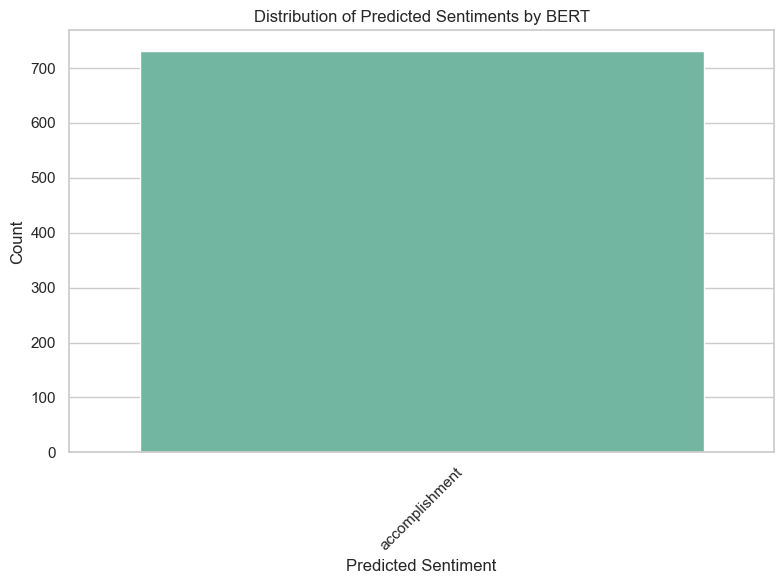

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="whitegrid")

# Count plot for predicted sentiment distribution
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x="PredictedSentiment", palette="Set2", order=df["PredictedSentiment"].value_counts().index)
plt.title("Distribution of Predicted Sentiments by BERT")
plt.xlabel("Predicted Sentiment")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
